Análise Descritiva - Tech Challenge 1 Grupo 87

Análise Descritiva do setor vinícola brasileiro a partir dos dados disponíveis

Autor: Luís Filipe Ginane Mayer dos Santos

Grupo: 87

Turma: 11DTAT

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

Bases de Dados

In [34]:
# Carregar arquivos para utilização

df_producao = pd.read_csv('Producao.csv', sep=';', encoding='latin1')
df_comercializacao = pd.read_csv('Comercializacao.csv', sep=';', encoding='latin1')
df_processamento = pd.read_csv('Processamento.csv', sep=';', encoding='latin1')
df_exportacao = pd.read_csv('Exportacao.csv', sep=';', encoding='latin1')
df_importacao = pd.read_csv('Importacao.csv', sep=';', encoding='latin1')

In [35]:
# Selecionar apenas as colunas numéricas (ignorando 'Id' e 'País')
colunas_numericas = df_exportacao.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'], errors='ignore')

# Verificar se todas as colunas numéricas em uma linha são zero
paises_com_zeros_em_todas_colunas = df_exportacao[
    (colunas_numericas == 0).all(axis=1)
]

# Exibir o nome dos países que se encaixam nesse critério
if not paises_com_zeros_em_todas_colunas.empty:
    print("Países com valor zero em todas as colunas numéricas:")
    display(paises_com_zeros_em_todas_colunas['País'])
else:
    print("Não há países com valor zero em todas as colunas numéricas.")

Não há países com valor zero em todas as colunas numéricas.


In [36]:
# Visualizando os tipos de dados
df_exportacao.dtypes

,0
Id,int64
País,object
1970,int64
1970.1,int64
1971,int64
...,...
2021.1,int64
2022,int64
2022.1,int64
2023,int64


Análise da base de exportação de vinhos

Ver nomes das colunas para sabermos o que existe

In [37]:
#Ver nomes das colunas para sabermos o que existe

print("\nNomes das colunas originais:")
print(df.columns.tolist())


Nomes das colunas originais:
['continent', 'region_country', 'product', 'variable', 'year', 'unit', 'quantity']


Remodelar o DataFrame de formato largo para longo

In [38]:
# Lista de colunas de ano para quantidade e valor
year_cols_quantity = [col for col in df_exportacao.columns if col.isdigit()]
year_cols_value = [col for col in df_exportacao.columns if col.endswith('.1')]

# Renomear a coluna para País (fixing encoding issue)
df_exportacao.rename(columns={'PaÃ\xads': 'País'}, inplace=True)

# Transformar o DataFrame para colunas de quantidade e valor separadamente
df_quantity = df_exportacao.melt(id_vars=['Id', 'País'], value_vars=year_cols_quantity, var_name='Ano', value_name='Quantidade')
df_value = df_exportacao.melt(id_vars=['Id', 'País'], value_vars=year_cols_value, var_name='Ano_value', value_name='Valor')

# Limpe a coluna 'Ano' em ambos os dataframes derretidos
df_quantity['Ano'] = df_quantity['Ano'].astype(int)
df_value['Ano_value'] = df_value['Ano_value'].str.replace('.1', '', regex=False).astype(int)

# Mesclar os dois dataframes em 'Id', 'País' e o 'Ano'/'Ano_value' limpo
df_long = pd.merge(df_quantity, df_value, left_on=['Id', 'País', 'Ano'], right_on=['Id', 'País', 'Ano_value'])

# Remova a coluna redundante 'Ano_value'
df_long.drop('Ano_value', axis=1, inplace=True)

# Converter 'Quantidade' e 'Valor' para erros numéricos e coercitivos
df_long['Quantidade'] = pd.to_numeric(df_long['Quantidade'], errors='coerce').fillna(0)
df_long['Valor'] = pd.to_numeric(df_long['Valor'], errors='coerce').fillna(0)

Verificar a nova estrutura e nomes das colunas

In [39]:
# Verificar a nova estrutura e nomes das colunas

print("\nPré-visualização dos dados após reshaping:")
display(df_long.head())

print("\nColunas após reshaping:")
print(df_long.columns.tolist())



Pré-visualização dos dados após reshaping:


,Id,País,Ano,Quantidade,Valor
0,1,AfeganistÃ£o,1970,0,0
1,2,Ãfrica do Sul,1970,0,0
2,3,"Alemanha, RepÃºblica DemocrÃ¡tica",1970,0,0
3,4,Angola,1970,0,0
4,5,Anguilla,1970,0,0



Colunas após reshaping:
['Id', 'País', 'Ano', 'Quantidade', 'Valor']


Total exportado por ano

In [40]:
df_ano = df_long.groupby('Ano')[['Quantidade', 'Valor']].sum().reset_index()

Gráfico 1 - Evolução das exportações (litros)

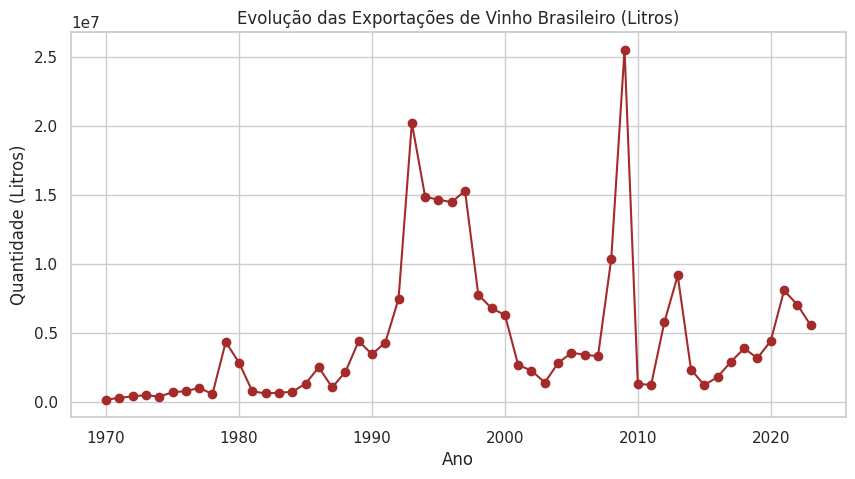

In [41]:
plt.figure(figsize=(10,5))
plt.plot(df_ano['Ano'], df_ano['Quantidade'], marker='o', color='brown')
plt.title('Evolução das Exportações de Vinho Brasileiro (Litros)')
plt.xlabel('Ano')
plt.ylabel('Quantidade (Litros)')
plt.grid(True)
plt.show()

Gráfico 2 - Top 10 países

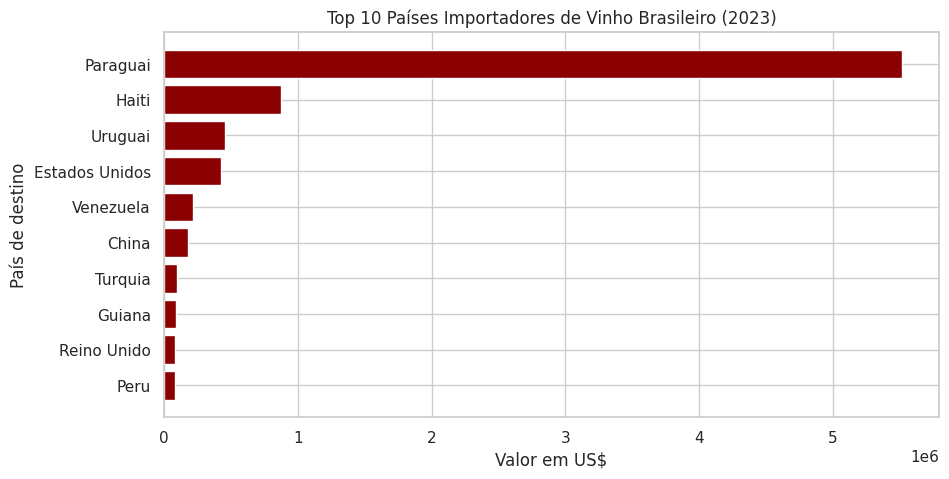

In [42]:
ultimo_ano = df_long['Ano'].max()
df_top = df_long[df_long['Ano'] == ultimo_ano].sort_values(by='Valor', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(df_top['País'], df_top['Valor'], color='darkred') # Use 'País' column
plt.title(f'Top 10 Países Importadores de Vinho Brasileiro ({ultimo_ano})')
plt.xlabel('Valor em US$')
plt.ylabel('País de destino')
plt.gca().invert_yaxis()  # deixa o país com maior valor no topo
plt.show()

Totais gerais últimos 15 anos

In [43]:
anos_recentes = sorted(df_long["Ano"].unique())[-15:]
df_15 = df_long[df_long["Ano"].isin(anos_recentes)]

total_litros = df_15["Quantidade"].sum()
total_valor = df_15["Valor"].sum()

print(f"\n💡 Total exportado nos últimos 15 anos:")
print(f" - Volume total: {total_litros:,.0f} litros")
print(f" - Valor total:  US$ {total_valor:,.2f}")


💡 Total exportado nos últimos 15 anos:
 - Volume total: 83,174,997 litros
 - Valor total:  US$ 114,449,292.00


Totais gerais todo o período

In [44]:
total_litros = df_long['Quantidade'].sum()
total_valor = df_long['Valor'].sum()

print(f"\n💡 Total exportado (todo o período):")
print(f" - Volume total: {total_litros:,.0f} litros")
print(f" - Valor total:  US$ {total_valor:,.2f}")


💡 Total exportado (todo o período):
 - Volume total: 254,077,044 litros
 - Valor total:  US$ 251,219,055.00


In [45]:
import pandas as pd

# Carregar a base
df = pd.read_csv("Exportacao.csv", sep=';', encoding='latin1')

# Manter apenas as colunas de 2008 a 2023

anos = list(range(2008, 2024))
colunas_quantidade = [str(ano) for ano in anos]
colunas_valor = [f"{ano}.1" for ano in anos]

colunas_usar = ["País"] + colunas_quantidade + colunas_valor
df = df[colunas_usar]

# Renomear colunas pra algo mais legível

novos_nomes = {"País": "Pais"}
for ano in anos:
    novos_nomes[str(ano)] = f"Quantidade_{ano}"
    novos_nomes[f"{ano}.1"] = f"Valor_{ano}"

df.rename(columns=novos_nomes, inplace=True)

# Resultado
print("✅ Dados limpos e prontos para análise!\n")
print(df.head())

print("\n📊 Colunas atuais:")
print(df.columns.tolist())

✅ Dados limpos e prontos para análise!

                                Pais  Quantidade_2008  Quantidade_2009  \
0                       AfeganistÃ£o                0                0   
1                     Ãfrica do Sul                0                0   
2  Alemanha, RepÃºblica DemocrÃ¡tica           265742           225086   
3                             Angola            25721            54786   
4                           Anguilla                0                0   

   Quantidade_2010  Quantidade_2011  Quantidade_2012  Quantidade_2013  \
0                0                0                0                0   
1                0                0                0                0   
2            27715            36070             8189            61699   
3            33557            13889             2833             1573   
4                0                0                0                0   

   Quantidade_2014  Quantidade_2015  Quantidade_2016  ...  Valor_2014  \
0  

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recarregar a base limpa
df = pd.read_csv("Exportacao.csv", sep=';', encoding='latin1')

# Renomear a coluna
df.rename(columns={'PaÃ\xads': 'País'}, inplace=True)

# Selecionar apenas 2008–2023
anos = list(range(2008, 2023))
colunas_quantidade = [str(ano) for ano in anos]
colunas_valor = [f"{ano}.1" for ano in anos]

colunas_usar = ["País"] + colunas_quantidade + colunas_valor
df = df[colunas_usar]

# Renomear colunas
df.rename(columns={"País": "Pais"}, inplace=True)
for ano in anos:
    df.rename(columns={str(ano): f"Quantidade_{ano}", f"{ano}.1": f"Valor_{ano}"}, inplace=True)

# Transformar dados de formato largo → longo

dados_quantidade = df.melt(id_vars="Pais", value_vars=[f"Quantidade_{ano}" for ano in anos],
                           var_name="Ano", value_name="Quantidade")
dados_valor = df.melt(id_vars="Pais", value_vars=[f"Valor_{ano}" for ano in anos],
                      var_name="Ano", value_name="Valor")

# Unificar os dois datasets
dados_quantidade["Ano"] = dados_quantidade["Ano"].str.replace("Quantidade_", "", regex=False).astype(int)
dados_valor["Ano"] = dados_valor["Ano"].str.replace("Valor_", "", regex=False).astype(int)

df_final = pd.merge(dados_quantidade, dados_valor, on=["Pais", "Ano"], how="inner")

# Limpeza de valores
df_final["Quantidade"] = pd.to_numeric(df_final["Quantidade"], errors="coerce").fillna(0)
df_final["Valor"] = pd.to_numeric(df_final["Valor"], errors="coerce").fillna(0)

Análise Descritiva

📊 Dimensões do dataset: (2055, 4)

📋 Visão geral:
                                Pais   Ano  Quantidade   Valor
0                       AfeganistÃ£o  2008           0       0
1                     Ãfrica do Sul  2008           0       0
2  Alemanha, RepÃºblica DemocrÃ¡tica  2008      265742  429970
3                             Angola  2008       25721   71083
4                           Anguilla  2008           0       0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


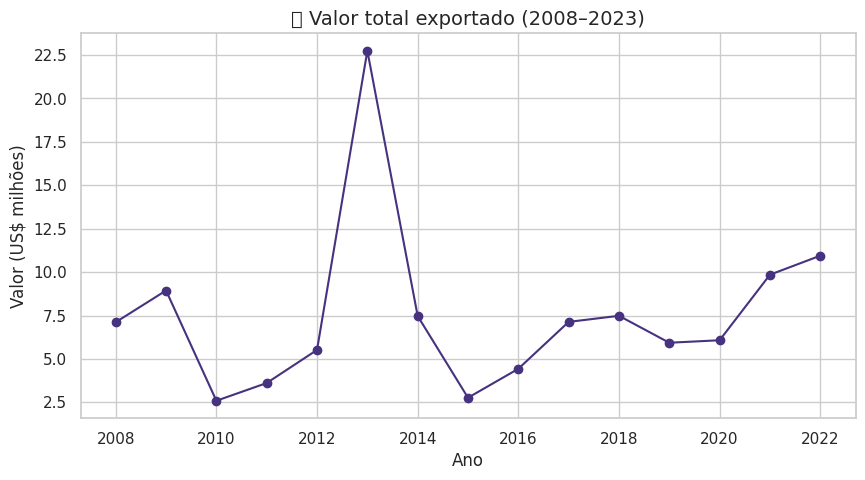

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


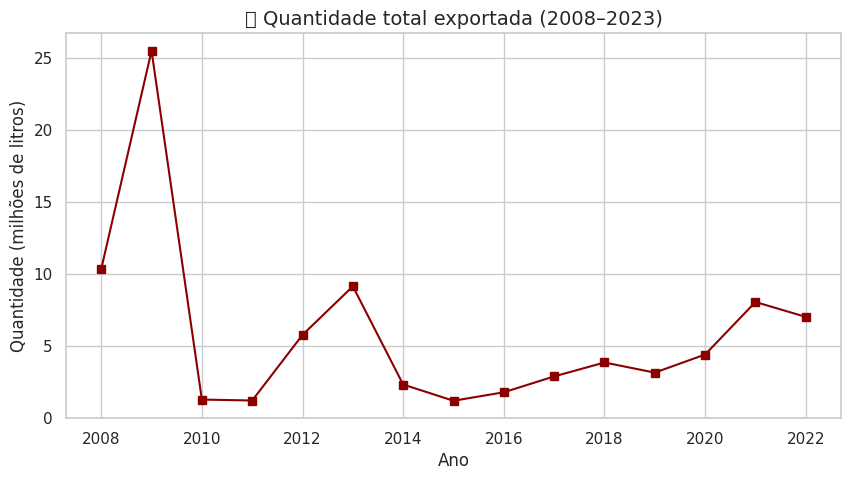

/tmp/ipython-input-1695465565.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_paises, y="Pais", x="Valor", palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


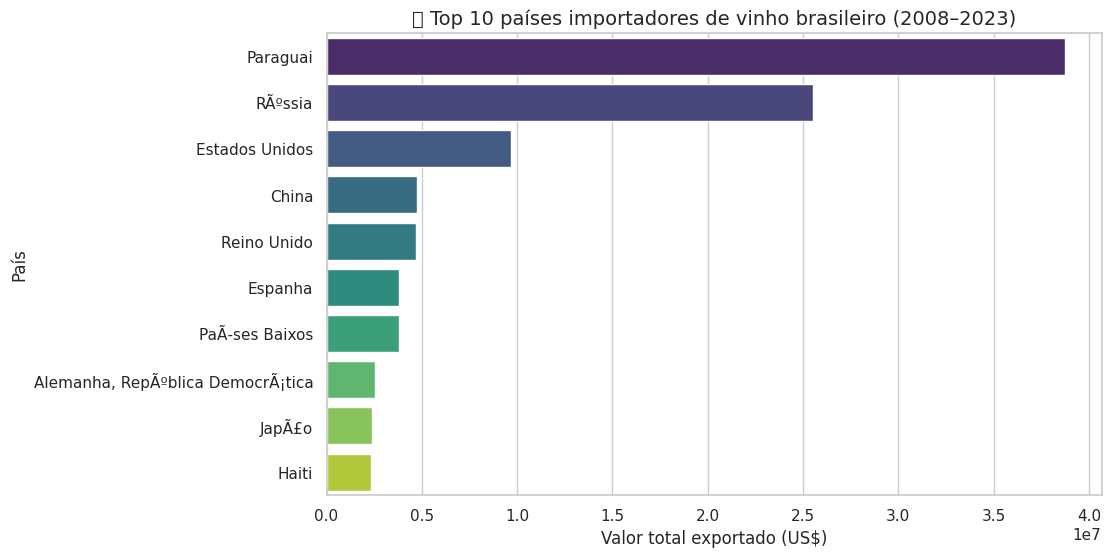

In [47]:
# Análise descritiva

df = pd.read_csv("Exportacao.csv", sep=';', encoding='latin1')
print("📊 Dimensões do dataset:", df_final.shape)
print("\n📋 Visão geral:")
print(df_final.head())

# Totais por ano
venda_anual = df_final.groupby("Ano")[["Quantidade", "Valor"]].sum().reset_index()

# Top 10 países exportadores no período
top_paises = (
    df_final.groupby("Pais")[["Quantidade", "Valor"]]
    .sum()
    .sort_values("Valor", ascending=False)
    .head(10)
    .reset_index()
)

# Visualizações
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(venda_anual["Ano"], venda_anual["Valor"]/1e6, marker="o")
plt.title("💰 Valor total exportado (2008–2023)", fontsize=14)
plt.ylabel("Valor (US$ milhões)")
plt.xlabel("Ano")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(venda_anual["Ano"], venda_anual["Quantidade"]/1e6, marker="s", color="darkred")
plt.title("🍷 Quantidade total exportada (2008–2023)", fontsize=14)
plt.ylabel("Quantidade (milhões de litros)")
plt.xlabel("Ano")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_paises, y="Pais", x="Valor", palette="viridis")
plt.title("🌎 Top 10 países importadores de vinho brasileiro (2008–2023)", fontsize=14)
plt.xlabel("Valor total exportado (US$)")
plt.ylabel("País")
plt.show()

Dados da Organização Internacional de Vinho

In [48]:
import pandas as pd

# Ler a planilha enviada
arquivo = "data (1).xlsx"

# Exibir todas as abas (caso o arquivo tenha mais de uma)
abas = pd.ExcelFile(arquivo).sheet_names
print("📑 Abas disponíveis na planilha:\n", abas)

# Ler a primeira aba
df = pd.read_excel(arquivo, sheet_name=0)

# Mostrar as 5 primeiras linhas
print("\n📋 Visualização inicial dos dados:")
print(df.head())

# Exibir os nomes das colunas
print("\n📊 Colunas encontradas:")
print(df.columns.tolist())

# Mostrar formato geral
print("\n🔍 Dimensões:", df.shape)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


📑 Abas disponíveis na planilha:
 ['Export']

📋 Visualização inicial dos dados:
  Continent Region/Country Product     Variable    Year     Unit  Quantity
0      Asia    Afghanistan    Wine  Consumption  2008.0  1000 hl       1.0
1      Asia    Afghanistan    Wine      Imports  2008.0  1000 hl       1.0
2      Asia    Afghanistan    Wine   Production  2008.0  1000 hl       0.0
3      Asia    Afghanistan    Wine  Consumption  2009.0  1000 hl       3.0
4      Asia    Afghanistan    Wine      Imports  2009.0  1000 hl       3.0

📊 Colunas encontradas:
['Continent', 'Region/Country', 'Product', 'Variable', 'Year', 'Unit', 'Quantity']

🔍 Dimensões: (12335, 7)


Limpeza e Padronização da Planilha Global de Vinhos

In [123]:
import pandas as pd

# Carregar novamente a planilha
df = pd.read_excel("data (1).xlsx", sheet_name="Export")

# Remover linhas vazias (se existirem)
df = df.dropna(how='all')

# Padronizar nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace('/', '_').str.replace(' ', '_')

# Filtrar apenas anos entre 2008 e 2023
df = df[(df['year'] >= 2008) & (df['year'] <= 2023)]

# Manter apenas o produto “Wine” (caso haja outros)
df = df[df['product'].str.lower() == 'wine']

# Remover espaços extras e padronizar os nomes de países
df['region_country'] = df['region_country'].str.strip()

# Corrigir caracteres com problemas de encoding
df['region_country'] = df['region_country'].apply(lambda x: x.encode('latin1', 'ignore').decode('utf-8', 'ignore') if isinstance(x, str) else x)

# Resumo
print("✅ Dados limpos:")
print(df.head(10))
print("\n📏 Dimensões após limpeza:", df.shape)

# Checar valores únicos na coluna de variáveis (para ver tipos de dado disponíveis)
print("\n📋 Variáveis disponíveis:", df['variable'].unique())

# Traducao países
traducao_paises = {
    "Brazil": "Brasil",
    "Argentina": "Argentina",
    "Chile": "Chile",
    "Uruguay": "Uruguai",
    "United States of America": "Estados Unidos da América",
    "Canada": "Canadá",
    "France": "França",
    "Italy": "Itália",
    "Spain": "Espanha",
    "Germany": "Alemanha",
    "Portugal": "Portugal",
    "United Kingdom": "Reino Unido",
    "Australia": "Austrália",
    "New Zealand": "Nova Zelândia",
    "China": "China",
    "Japan": "Japão",
    "South Africa": "África do Sul",
    "Russia": "Rússia",
    "Mexico": "México",
    "Peru": "Peru",
    "Paraguay": "Paraguai",
    "Bolivia": "Bolívia",
    "Colombia": "Colômbia",
    "Venezuela": "Venezuela",
    "India": "Índia",
    "Afghanistan": "Afeganistão",
    "Turkey": "Turquia",
    "Sweden": "Suécia",
    "Norway": "Noruega",
    "Finland": "Finlândia",
    "Denmark": "Dinamarca",
    "Belgium": "Bélgica",
    "Netherlands": "Países Baixos",
    "Poland": "Polônia",
    "Austria": "Áustria",
    "Switzerland": "Suíça",
    "Ireland": "Irlanda",
    "Greece": "Grécia",
    "Hungary": "Hungria",
    "Czech Republic": "República Tcheca",
    "Slovakia": "Eslováquia",
    "Croatia": "Croácia",
    "Slovenia": "Eslovênia",
    "Romania": "Romênia",
    "Bulgaria": "Bulgária",
    "Ukraine": "Ucrânia",
    "Serbia": "Sérvia",
    "Israel": "Israel",
    "Lebanon": "Líbano",
    "Egypt": "Egito",
    "Morocco": "Marrocos",
    "Tunisia": "Tunísia",
    "Nigeria": "Nigéria",
    "Kenya": "Quênia",
    "Ethiopia": "Etiópia",
    "People's Republic of China": "China",
    "Argentina": "Argentina"
}

# Aplicar tradução
df['region_country'] = df['region_country'].replace(traducao_paises)

# Conferir amostra
print("🌎 Exemplo de países após tradução:")
print(df['region_country'].unique()[:30])


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Dados limpos:
  continent region_country product     variable    year     unit  quantity
0      Asia    Afghanistan    Wine  Consumption  2008.0  1000 hl       1.0
1      Asia    Afghanistan    Wine      Imports  2008.0  1000 hl       1.0
2      Asia    Afghanistan    Wine   Production  2008.0  1000 hl       0.0
3      Asia    Afghanistan    Wine  Consumption  2009.0  1000 hl       3.0
4      Asia    Afghanistan    Wine      Imports  2009.0  1000 hl       3.0
5      Asia    Afghanistan    Wine   Production  2009.0  1000 hl       0.0
6      Asia    Afghanistan    Wine  Consumption  2010.0  1000 hl       2.0
7      Asia    Afghanistan    Wine      Imports  2010.0  1000 hl       2.0
8      Asia    Afghanistan    Wine   Production  2010.0  1000 hl       0.0
9      Asia    Afghanistan    Wine  Consumption  2011.0  1000 hl       1.0

📏 Dimensões após limpeza: (12333, 7)

📋 Variáveis disponíveis: ['Consumption' 'Imports' 'Production' 'Exports']
🌎 Exemplo de países após tradução:
['Afeganist

Padronizar nomes dos países

In [126]:
# Exemplo de tradução
traducao_paises = {
    "Brazil": "Brasil",
    "France": "França",
    "Italy": "Itália",
    "Spain": "Espanha",
    "Germany": "Alemanha",
    "United States": "Estados Unidos",
    "China": "China",
    "Argentina": "Argentina",
    "Chile": "Chile",
    "South Africa": "África do Sul"
}

# Aplicar tradução na base global
df['region_country_pt'] = df['region_country'].replace(traducao_paises)

In [125]:
print("Summary Statistics for df_brazil_exports:")
display(df_brazil_exports.describe())

Summary Statistics for df_brazil_exports:


,Ano,Quantidade,Valor_USD,Quantidade_Global,Market_Share_Quantity
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2015.500000,158.437500,62.375000,61.937500,203.062901
std,4.760952,625.531131,237.510666,59.416573,801.976522
min,2008.000000,0.000000,0.000000,13.000000,0.000000
25%,2011.750000,0.000000,0.000000,25.250000,0.000000
50%,2015.500000,0.000000,0.000000,46.000000,0.000000
75%,2019.250000,0.000000,0.000000,80.000000,0.000000
max,2023.000000,2504.000000,952.000000,257.000000,3210.256410


Tabela pedida

In [77]:
import pandas as pd

# 1️⃣ Ler o arquivo Excel enviado
arquivo = "data (1).xlsx"

# Mostrar as abas existentes
abas = pd.ExcelFile(arquivo).sheet_names
print("📑 Abas disponíveis:", abas)

# 2️⃣ Ler a aba principal (ajuste se o nome for diferente)
df = pd.read_excel(arquivo, sheet_name=0)

# 3️⃣ Visualizar as primeiras linhas
print("\n📋 Primeiras linhas:")
print(df.head())

# 4️⃣ Mostrar colunas e dimensões
print("\n📊 Colunas:", df.columns.tolist())
print("🔢 Dimensões:", df.shape)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


📑 Abas disponíveis: ['Export']

📋 Primeiras linhas:
  Continent Region/Country Product     Variable    Year     Unit  Quantity
0      Asia    Afghanistan    Wine  Consumption  2008.0  1000 hl       1.0
1      Asia    Afghanistan    Wine      Imports  2008.0  1000 hl       1.0
2      Asia    Afghanistan    Wine   Production  2008.0  1000 hl       0.0
3      Asia    Afghanistan    Wine  Consumption  2009.0  1000 hl       3.0
4      Asia    Afghanistan    Wine      Imports  2009.0  1000 hl       3.0

📊 Colunas: ['Continent', 'Region/Country', 'Product', 'Variable', 'Year', 'Unit', 'Quantity']
🔢 Dimensões: (12335, 7)


Limpeza e conversão de unidade para litros

In [79]:
import pandas as pd

# Ler a aba principal
df = pd.read_excel("data (1).xlsx", sheet_name="Export")

# Limpeza inicial
df = df.dropna(how='all')
df.columns = df.columns.str.strip()

# Filtrar apenas vinho e anos 2008–2023
df = df[(df['Product'] == 'Wine') & (df['Year'].between(2008, 2023))]

# Converter de 1000 hectolitros para litros
df['Litros'] = df['Quantity'] * 100_000  # 1000 hl × 100 L = 100.000 L

# Padronizar nomes para português
df.rename(columns={
    'Continent': 'Continente',
    'Region/Country': 'Pais',
    'Variable': 'Variavel',
    'Year': 'Ano',
    'Unit': 'Unidade'
}, inplace=True)

# Ver resultado
print("✅ Dados prontos e convertidos para litros:")
print(df.head())

print("\n📏 Dimensão:", df.shape)
print("\n🔍 Variáveis disponíveis:", df['Variavel'].unique())


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Dados prontos e convertidos para litros:
  Continente         Pais Product     Variavel     Ano  Unidade  Quantity  \
0       Asia  Afghanistan    Wine  Consumption  2008.0  1000 hl       1.0   
1       Asia  Afghanistan    Wine      Imports  2008.0  1000 hl       1.0   
2       Asia  Afghanistan    Wine   Production  2008.0  1000 hl       0.0   
3       Asia  Afghanistan    Wine  Consumption  2009.0  1000 hl       3.0   
4       Asia  Afghanistan    Wine      Imports  2009.0  1000 hl       3.0   

     Litros  
0  100000.0  
1  100000.0  
2       0.0  
3  300000.0  
4  300000.0  

📏 Dimensão: (12333, 8)

🔍 Variáveis disponíveis: ['Consumption' 'Imports' 'Production' 'Exports']


In [82]:
# Traducao países
traducao_paises = {
    "Brazil": "Brasil",
    "Argentina": "Argentina",
    "Chile": "Chile",
    "Uruguay": "Uruguai",
    "United States of America": "Estados Unidos da América",
    "Canada": "Canadá",
    "France": "França",
    "Italy": "Itália",
    "Spain": "Espanha",
    "Germany": "Alemanha",
    "Portugal": "Portugal",
    "United Kingdom": "Reino Unido",
    "Australia": "Austrália",
    "New Zealand": "Nova Zelândia",
    "China": "China",
    "Japan": "Japão",
    "South Africa": "África do Sul",
    "Russia": "Rússia",
    "Mexico": "México",
    "Peru": "Peru",
    "Paraguay": "Paraguai",
    "Bolivia": "Bolívia",
    "Colombia": "Colômbia",
    "Venezuela": "Venezuela",
    "India": "Índia",
    "Afghanistan": "Afeganistão",
    "Turkey": "Turquia",
    "Sweden": "Suécia",
    "Norway": "Noruega",
    "Finland": "Finlândia",
    "Denmark": "Dinamarca",
    "Belgium": "Bélgica",
    "Netherlands": "Países Baixos",
    "Poland": "Polônia",
    "Austria": "Áustria",
    "Switzerland": "Suíça",
    "Ireland": "Irlanda",
    "Greece": "Grécia",
    "Hungary": "Hungria",
    "Czech Republic": "República Tcheca",
    "Slovakia": "Eslováquia",
    "Croatia": "Croácia",
    "Slovenia": "Eslovênia",
    "Romania": "Romênia",
    "Bulgaria": "Bulgária",
    "Ukraine": "Ucrânia",
    "Serbia": "Sérvia",
    "Israel": "Israel",
    "Lebanon": "Líbano",
    "Egypt": "Egito",
    "Morocco": "Marrocos",
    "Tunisia": "Tunísia",
    "Nigeria": "Nigéria",
    "Kenya": "Quênia",
    "Ethiopia": "Etiópia",
    "People's Republic of China": "China",
    "Argentina": "Argentina"
}

# Aplicar tradução
df['Pais'] = df['Pais'].replace(traducao_paises)

# Conferir amostra
print("🌎 Exemplo de países após tradução:")
print(df['Pais'].unique()[:30])

🌎 Exemplo de países após tradução:
['Afeganistão' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Austrália' 'Áustria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Bélgica' 'Belgium and Luxemburg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolívia' 'Bosnia and Herzegovina' 'Botswana' 'Brasil'
 'Brunei Darussalam' 'Bulgária']


Evolução Global do Mercado de Vinhos de 2008 até 2023

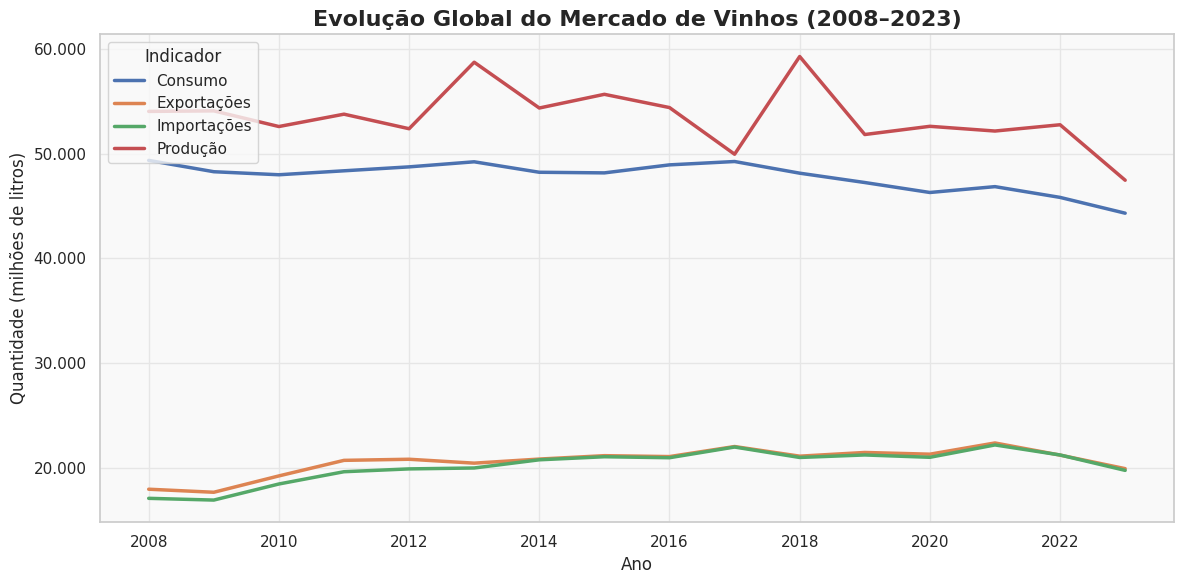

In [93]:
df_global = df.groupby(['Ano', 'Variavel'])['Milhoes_Litros'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='Ano', y='Milhoes_Litros', hue='Variavel', linewidth=2.5)
plt.title('Evolução Global do Mercado de Vinhos (2008–2023)', fontsize=16, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Quantidade (milhões de litros)')
plt.legend(title='Indicador', loc='upper left')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Top 10 países exportadores de 2008 até 2023

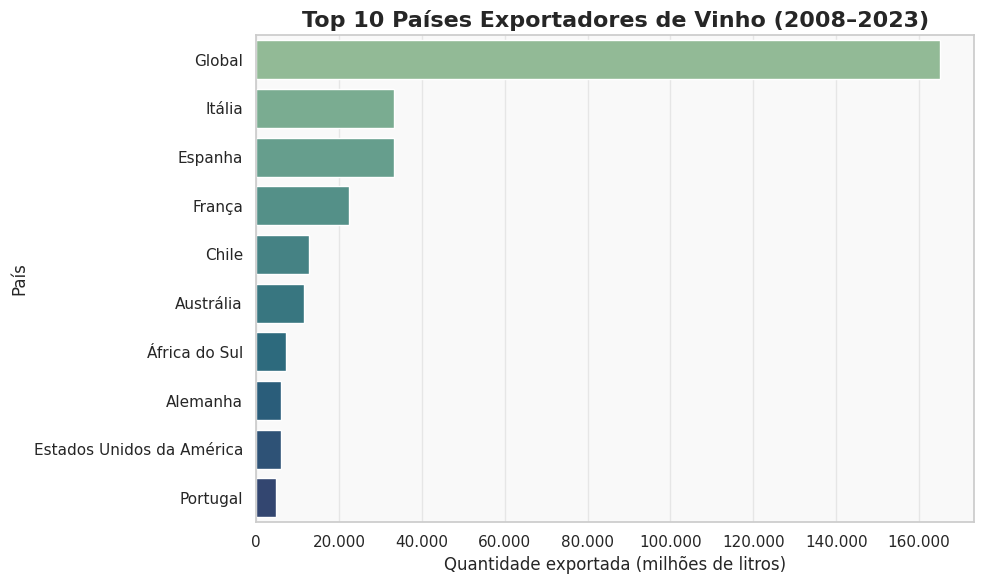

In [94]:
df_exports = df[df['Variavel'] == 'Exportações']
top_exports = df_exports.groupby('Pais')['Milhoes_Litros'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_exports, x='Milhoes_Litros', y='Pais', palette='crest', hue='Pais', legend=False)
plt.title('Top 10 Países Exportadores de Vinho (2008–2023)', fontsize=16, weight='bold')
plt.xlabel('Quantidade exportada (milhões de litros)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Gráficos finais

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Estilo
sns.set(style="whitegrid", rc={
    'axes.facecolor':'#f9f9f9',
    'grid.color': '#e6e6e6',
    'axes.edgecolor':'#cccccc',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

def milhar(x, pos):
    return f"{int(x):,}".replace(",", ".")
formatter = FuncFormatter(milhar)

palette_vinho_10 = sns.color_palette([
    "#5a0f1b", "#701926", "#8c2533", "#a8324a", "#c94f5f",
    "#d86e72", "#e68c8b", "#efaaa4", "#f8c8be", "#fde6da"
])

# se tiver 'quantity' em 1000 hl, converter: Litros = quantity * 100_000
if 'quantity' in df.columns:
    df['Litros'] = df['quantity'] * 100_000
else:
    raise ValueError("DataFrame não tem coluna 'Litros' nem 'quantity' — verifique a leitura.")

trad = {'Production': 'Produção', 'Consumption': 'Consumo', 'Exports': 'Exportações', 'Imports': 'Importações'}
df['variable'] = df['variable'].replace(trad)

df['Milhoes_Litros'] = df['Litros'] / 1_000_000

In [121]:
# Dimensões da base
linhas, colunas = df.shape
print(f"📏 A base contém {linhas:,} linhas e {colunas} colunas.")


📏 A base contém 12,333 linhas e 9 colunas.


In [122]:
# Contagem de valores ausentes por coluna
missing = df.isna().sum()
percent_missing = (missing / len(df)) * 100

# Exibir apenas colunas com pelo menos 1 valor ausente
missing_data = pd.DataFrame({
    'Valores Ausentes': missing,
    'Percentual (%)': percent_missing.round(2)
})
missing_data = missing_data[missing_data['Valores Ausentes'] > 0]

print("\n🔍 Valores ausentes por coluna:")
display(missing_data if not missing_data.empty else "✅ Nenhum valor ausente encontrado.")



🔍 Valores ausentes por coluna:


'✅ Nenhum valor ausente encontrado.'

Evolução Global do Mercado de Vinhos (2008-2023)

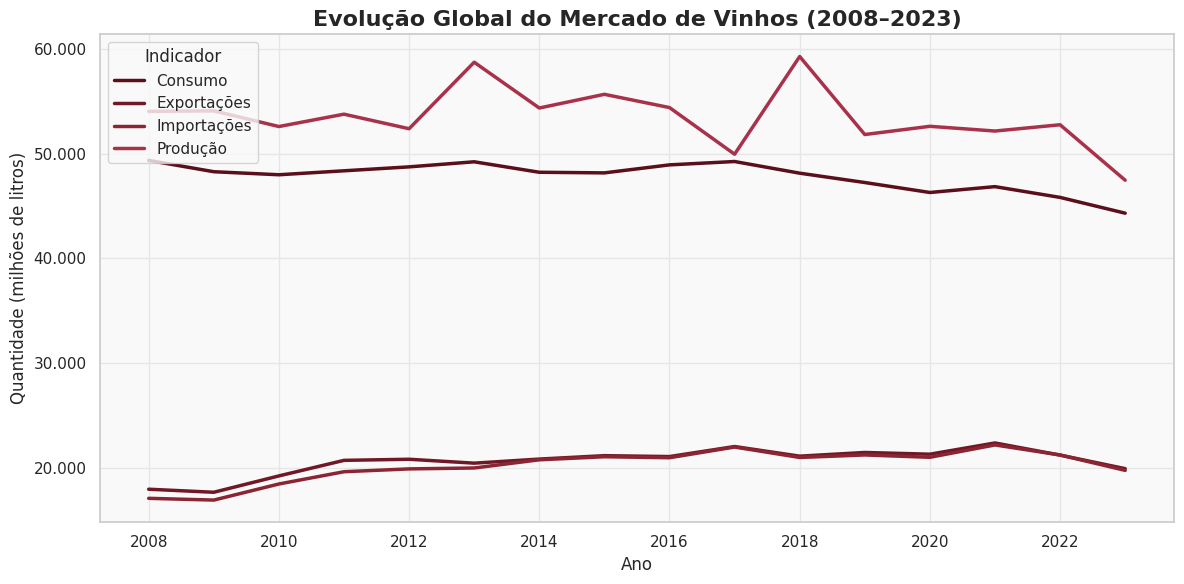

In [117]:
df_global = df.groupby(['Ano', 'Variavel'])['Milhoes_Litros'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='Ano', y='Milhoes_Litros', hue='Variavel',
             linewidth=2.5, palette=palette_vinho_10[:len(df_global['Variavel'].unique())])
plt.title('Evolução Global do Mercado de Vinhos (2008–2023)', fontsize=16, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Quantidade (milhões de litros)')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(title='Indicador', loc='upper left')
plt.tight_layout()
plt.show()

Top 10 Países Exportadores de Vinho (2008-2023)

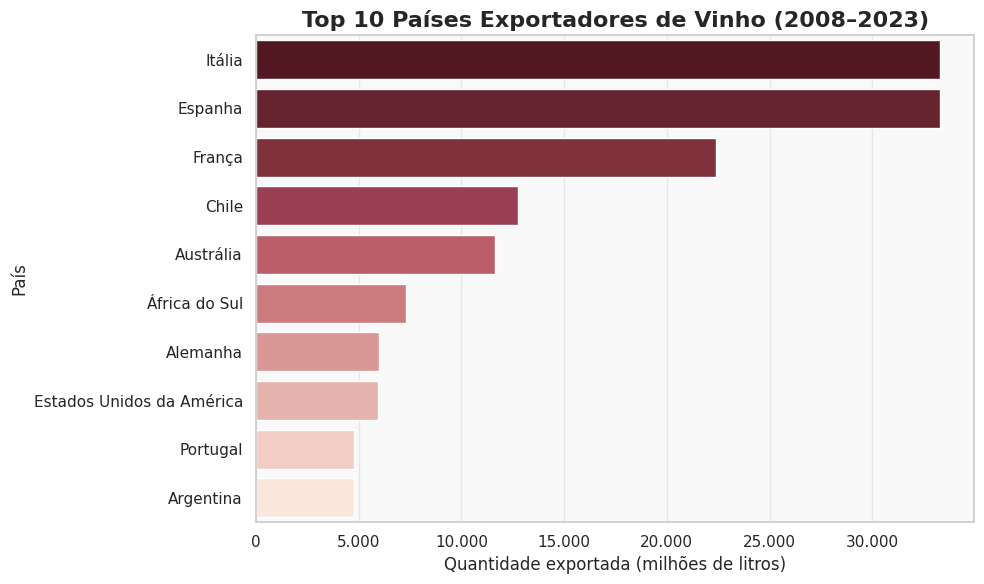

In [119]:
df_exports = df_validos[df_validos['Variavel'] == 'Exportações']
top_exports = (
    df_exports.groupby('Pais')['Milhoes_Litros']
    .sum()
    .nlargest(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_exports,
    x='Milhoes_Litros',
    y='Pais',
    hue='Pais',
    palette=palette_vinho_10,
    legend=False
)
plt.title('Top 10 Países Exportadores de Vinho (2008–2023)', fontsize=16, weight='bold')
plt.xlabel('Quantidade exportada (milhões de litros)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Top 10 Países Consumidores de Vinho (2008-2023)

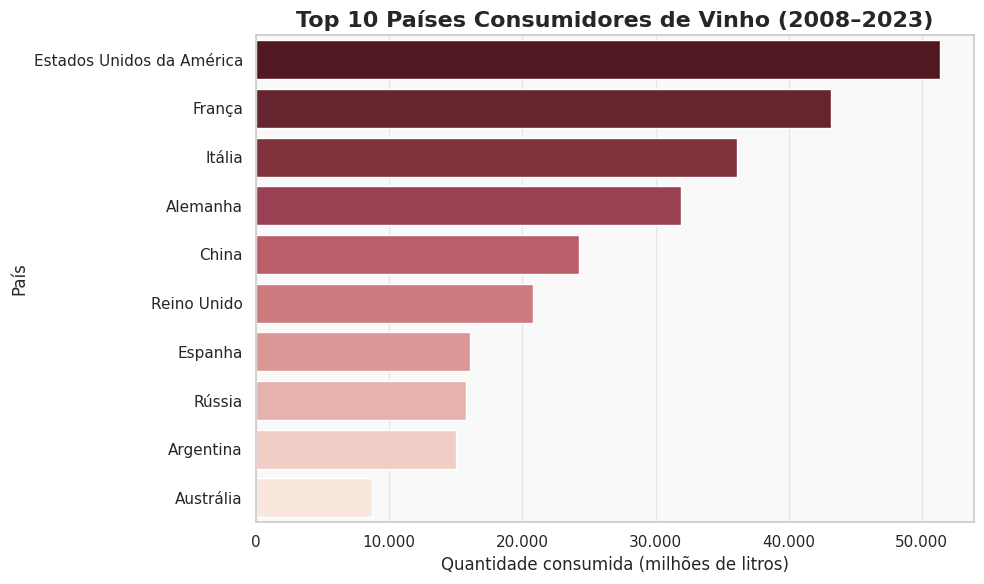

In [120]:
df_consumo = df_validos[df_validos['Variavel'] == 'Consumo']
top_consumo = (
    df_consumo.groupby('Pais')['Milhoes_Litros']
    .sum()
    .nlargest(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_consumo,
    x='Milhoes_Litros',
    y='Pais',
    hue='Pais',
    palette=palette_vinho_10,
    legend=False
)
plt.title('Top 10 Países Consumidores de Vinho (2008–2023)', fontsize=16, weight='bold')
plt.xlabel('Quantidade consumida (milhões de litros)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Produção x Consumo Global de Vinho (comparativo global 2008-2023)

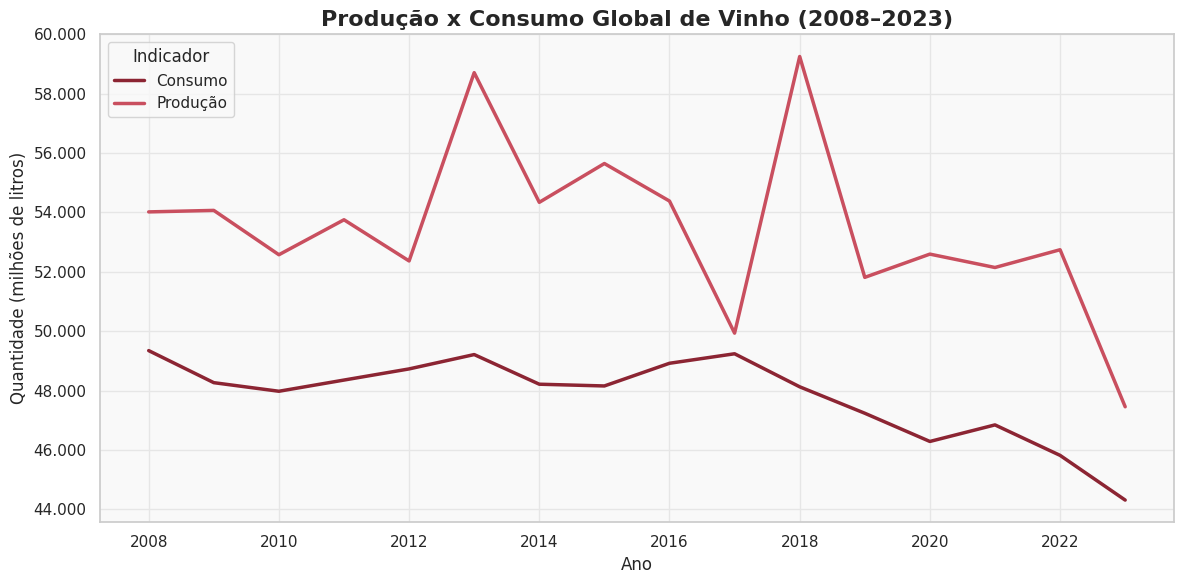

In [105]:
df_comp = df[df['Variavel'].isin(['Produção', 'Consumo'])]
df_comp = df_comp.groupby(['Ano', 'Variavel'])['Milhoes_Litros'].sum().reset_index()

pal_lines = [palette_vinho_10[2], palette_vinho_10[4]]
plt.figure(figsize=(12,6))
sns.lineplot(data=df_comp, x='Ano', y='Milhoes_Litros', hue='Variavel',
             linewidth=2.5, palette=pal_lines)
plt.title('Produção x Consumo Global de Vinho (2008–2023)', fontsize=16, weight='bold')
plt.xlabel('Ano')
plt.ylabel('Quantidade (milhões de litros)')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(title='Indicador', loc='upper left')
plt.tight_layout()
plt.show()

Tabelas referente os 4 gráficos

In [108]:
# Evolução Global do Mercado de Vinhos (2008-2023)
tabela_evolucao = df.groupby(['Ano', 'Variavel'])['Milhoes_Litros'].sum().reset_index()
tabela_evolucao = tabela_evolucao.pivot(index='Ano', columns='Variavel', values='Milhoes_Litros').fillna(0)
tabela_evolucao = tabela_evolucao.round(2)

print("Tabela 1 – Evolução Global do Mercado de Vinhos (2008–2023):")
display(tabela_evolucao.head(10))


# Top 10 países exportadores (2008–2023)
tabela_exportadores = (
    df[df['Variavel'] == 'Exportações']
    .groupby('Pais')['Milhoes_Litros']
    .sum()
    .nlargest(10)
    .reset_index()
)
tabela_exportadores = tabela_exportadores.round(2)
print("\n Tabela 2 – Top 10 Países Exportadores de Vinho (2008–2023):")
display(tabela_exportadores)


# TOP 10 Países Consumidores (2008–2023)
tabela_consumidores = (
    df[df['Variavel'] == 'Consumo']
    .groupby('Pais')['Milhoes_Litros']
    .sum()
    .nlargest(10)
    .reset_index()
)
tabela_consumidores = tabela_consumidores.round(2)
print("\n🍷 Tabela 3 – Top 10 Países Consumidores de Vinho (2008–2023):")
display(tabela_consumidores)


# Produção x Consumo Global (2008–2023)
tabela_prod_consumo = (
    df[df['Variavel'].isin(['Produção', 'Consumo'])]
    .groupby(['Ano', 'Variavel'])['Milhoes_Litros']
    .sum()
    .reset_index()
    .pivot(index='Ano', columns='Variavel', values='Milhoes_Litros')
    .fillna(0)
)
tabela_prod_consumo = tabela_prod_consumo.round(2)

print("\n Tabela 4 – Produção x Consumo Global (2008–2023):")
display(tabela_prod_consumo)

Tabela 1 – Evolução Global do Mercado de Vinhos (2008–2023):


Variavel,Consumo,Exportações,Importações,Produção
Ano,,,,
2008.0,49347.7,17993.6,17124.4,54020.1
2009.0,48268.0,17702.9,16958.4,54070.5
2010.0,47978.6,19262.6,18492.2,52577.2
2011.0,48355.9,20745.3,19661.8,53755.1
2012.0,48731.1,20850.7,19931.0,52367.8
2013.0,49214.5,20478.7,20017.7,58709.3
2014.0,48216.1,20867.9,20798.5,54342.5
2015.0,48157.2,21192.1,21089.7,55649.2
2016.0,48921.2,21106.3,20996.1,54385.3



 Tabela 2 – Top 10 Países Exportadores de Vinho (2008–2023):


,Pais,Milhoes_Litros
0,Global,164994.5
1,Itália,33290.4
2,Espanha,33288.0
3,França,22408.1
4,Chile,12755.1
5,Austrália,11632.6
6,África do Sul,7287.2
7,Alemanha,5988.5
8,Estados Unidos da América,5919.7
9,Portugal,4760.4



🍷 Tabela 3 – Top 10 Países Consumidores de Vinho (2008–2023):


,Pais,Milhoes_Litros
0,Global,382533.2
1,Estados Unidos da América,51354.5
2,França,43202.7
3,Itália,36100.0
4,Alemanha,31946.2
5,China,24268.9
6,Reino Unido,20789.0
7,Espanha,16039.1
8,Rússia,15748.6
9,Argentina,15030.0



 Tabela 4 – Produção x Consumo Global (2008–2023):


Variavel,Consumo,Produção
Ano,,
2008.0,49347.7,54020.1
2009.0,48268.0,54070.5
2010.0,47978.6,52577.2
2011.0,48355.9,53755.1
2012.0,48731.1,52367.8
2013.0,49214.5,58709.3
2014.0,48216.1,54342.5
2015.0,48157.2,55649.2
2016.0,48921.2,54385.3


Gráficos sem a soma global, apenas top 10 de países

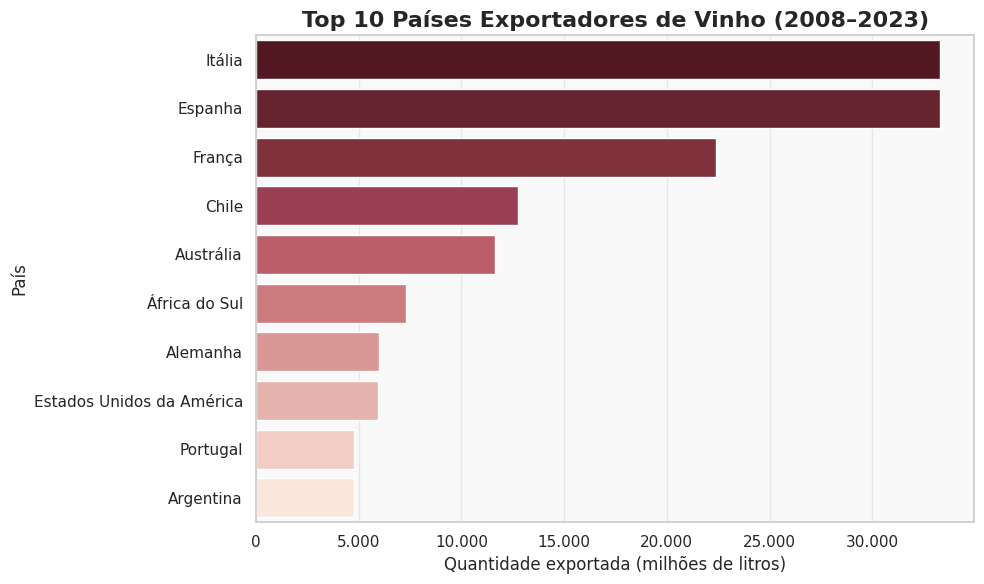

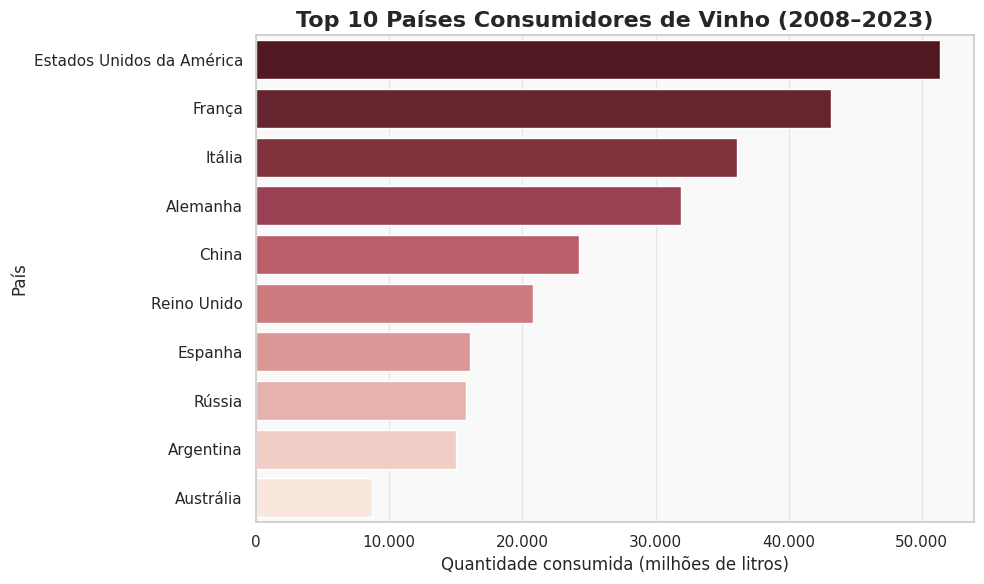

✅ Top 10 Exportadores (corrigido):


,Pais,Milhoes_Litros
0,Itália,33290.4
1,Espanha,33288.0
2,França,22408.1
3,Chile,12755.1
4,Austrália,11632.6
5,África do Sul,7287.2
6,Alemanha,5988.5
7,Estados Unidos da América,5919.7
8,Portugal,4760.4
9,Argentina,4756.5



✅ Top 10 Consumidores (corrigido):


,Pais,Milhoes_Litros
0,Estados Unidos da América,51354.5
1,França,43202.7
2,Itália,36100.0
3,Alemanha,31946.2
4,China,24268.9
5,Reino Unido,20789.0
6,Espanha,16039.1
7,Rússia,15748.6
8,Argentina,15030.0
9,Austrália,8689.5


In [118]:
# Filtrar registros válidos (sem "Global" ou similares)
df_validos = df[~df['Pais'].str.lower().isin(['global', 'world', 'total', 'mundo'])]

# Mostrar as novas tabelas Top 10 corrigidas

print("✅ Top 10 Exportadores:")
display(top_exports)

print("\n✅ Top 10 Consumidores:")
display(top_consumo)
